# Check Model Results
The purpose of this notebook is:
+ To check the results of the trained model that is generated in the "Model Training (Binary approach)" notebook.
+ To check the results evaluating the entire dataset.

In [1]:
#Set the path where the model and other files are saved in
path = r'D:/Capstone Project/Outputs DL model/binary approach/'

## Load the trained model and check the training and validation results

In [2]:
import tensorflow as tf
from tensorflow import keras

#Load the model used for training
model = keras.models.load_model(path+'DeepLearningModel.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 40)      400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 40)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 40)      14440     
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 40)      14440     
                                                                 
 conv2d_3 (Conv2D)           (None, 118, 118, 80)      28880     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 80)       0         
 2D)                                                    

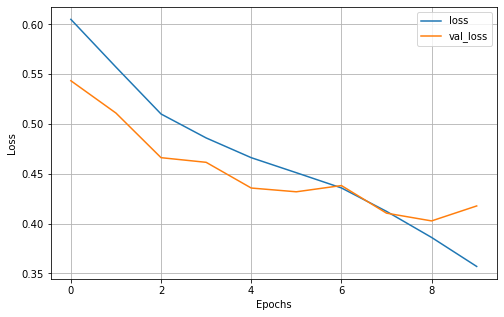

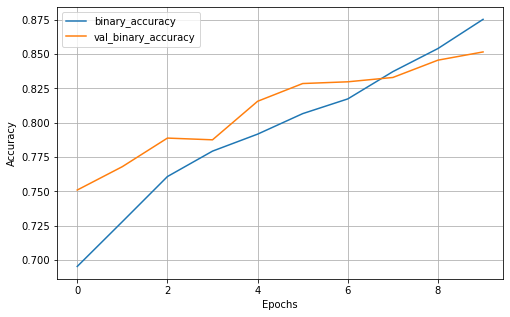

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the history of the model and see the loss and accuracy of train/val evolution
history = np.load(path+'history.npy',allow_pickle=True).item()

pd.DataFrame(history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Loss")
plt.grid(True)
plt.show()

pd.DataFrame(history)[['binary_accuracy','val_binary_accuracy']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Evaluate the test set with the trained model

In [5]:
# Make the prediction with the test set
X_test = np.load(path+"v3/X_test.npy")
y_test = np.load(path+"v3/y_test.npy")

y_pred = model.predict(X_test, verbose=1)

#Set ones only for the class with more accuracy
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

#Convert from 2D (1HotEnc) to 1D the y_test and y_pred array
label_pred = tf.argmax(y_pred, axis = 1)
label_test = tf.argmax(y_test, axis = 1)

50/50 [==============================] - 11s 226ms/step


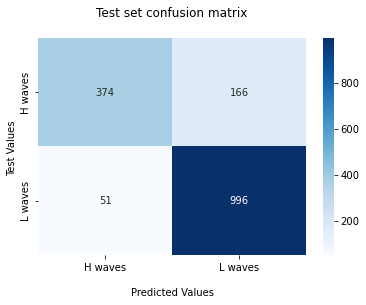

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix
cf_matrix = confusion_matrix(label_test, label_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Test set confusion matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Test Values ');

#Ticket labels
ax.xaxis.set_ticklabels(['H waves', 'L waves'])
ax.yaxis.set_ticklabels(['H waves', 'L waves'], va='center')

#Display the visualization of the Confusion Matrix.
plt.show()

In [7]:
#Compute the accuracy of the test set
test_accuracy = (cf_matrix[0,0]+cf_matrix[1,1]) / np.sum(cf_matrix)
print("Test accuracy -> ", test_accuracy)

Test accuracy ->  0.8632640201638311


## Evaluate the full dataset with the trained model

In [8]:
# Make the prediction with the full set
X = np.load(path+"X.npy")
y = np.load(path+"y.npy")

y_pred = model.predict(X, verbose=1)

#Set ones only for the class with more accuracy
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

#Convert from 2D (1HotEnc) to 1D the y_test and y_pred array
label_pred = tf.argmax(y_pred, axis = 1)
label_full = tf.argmax(y, axis = 1)

496/496 [==============================] - 130s 262ms/step


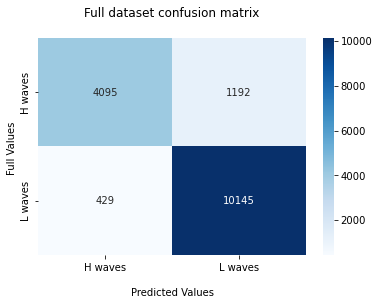

In [9]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(label_full, label_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Full dataset confusion matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Full Values ')

#Ticket labels
ax.xaxis.set_ticklabels(['H waves', 'L waves'])
ax.yaxis.set_ticklabels(['H waves', 'L waves'], va='center')

#Display the visualization of the Confusion Matrix
plt.show()

In [10]:
full_accuracy = (cf_matrix[0,0]+cf_matrix[1,1]) / np.sum(cf_matrix)
print("Full accuracy -> ", full_accuracy)

Full accuracy ->  0.8977996343231827
